Setup

In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone repo
%cd /content/yolov5
%pip install -qr requirements.txt # install depedencies
%pip install -q roboflow
import torch
import os
from IPython.display import Image  # to display images
from roboflow import Roboflow
print('Setup complete. Using torch %s %s' % (torch.__version__,
                                             torch.cuda.get_device_properties(0)
                                             if torch.cuda.is_available() else 'CPU'))


Cloning into 'yolov5'...
remote: Enumerating objects: 16094, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16094 (delta 0), reused 4 (delta 0), pack-reused 16089
Receiving objects: 100% (16094/16094), 14.75 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (11023/11023), done.
/content/yolov5
Setup complete. Using torch 2.1.0+cu118 CPU


In [ ]:
# set up enviroment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

Get Dataset from Roboflow

In [ ]:
rf = Roboflow(api_key="imoxqfrRdyAF2KQaCV8Q")
project = rf.workspace("yustina-yunita-pwhdi").project("brand-nczv1")
dataset = project.version(7).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Brand-7 in yolov5pytorch:: 100%|██████████| 2472/2472 [00:00<00:00, 4409.17it/s]


Train Yolo Model

In [ ]:
!python train.py --img 416 --batch 16 --epochs 200 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

2023-12-13 06:49:09.520164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 06:49:09.520327: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 06:49:09.520537: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/datasets/Brand-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=Fa

Show Training Results

In [ ]:
# Start Tensorboard
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

Prediction

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Brand-7/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/91 /content/datasets/Brand-7/valid/images/16_jpg.rf.d3851a1834a6ca0d2c7eb4c2850dbadc.jpg: 416x288 2 Adidass, 41.2ms
image 2/91 /content/datasets/Brand-7/valid/images/17_jpg.rf.aabbf9a6ca55a2637254f2f19e781530.jpg: 416x256 2 Adidass, 41.9ms
image 3/91 /content/datasets/Brand-7/valid/images/19_jpg.rf.d9a6

Display Inference Images

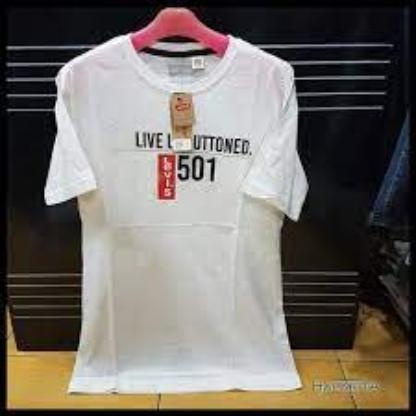

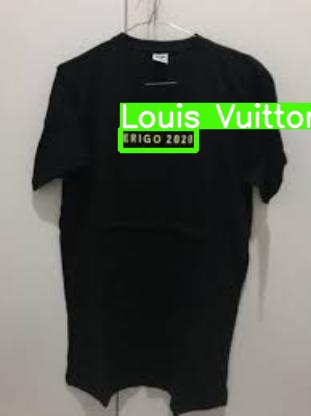

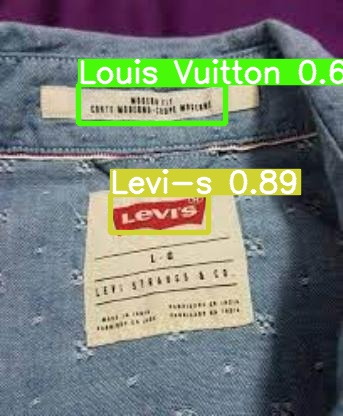

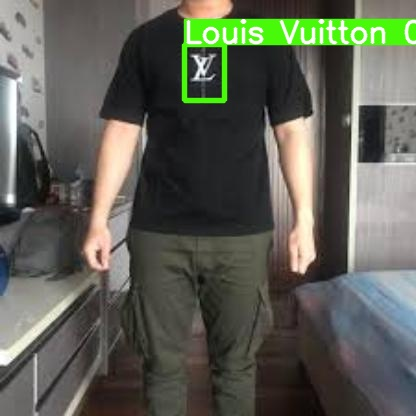

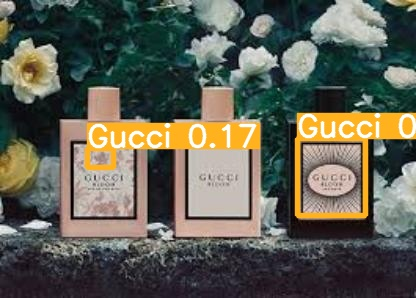

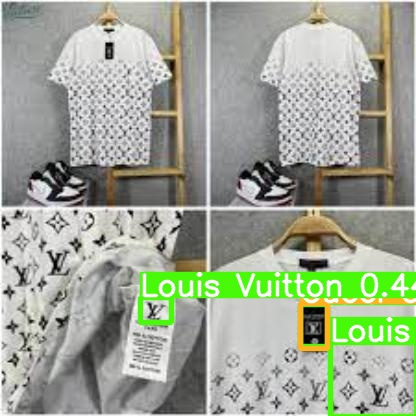

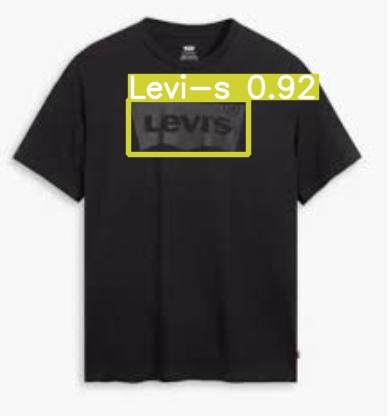

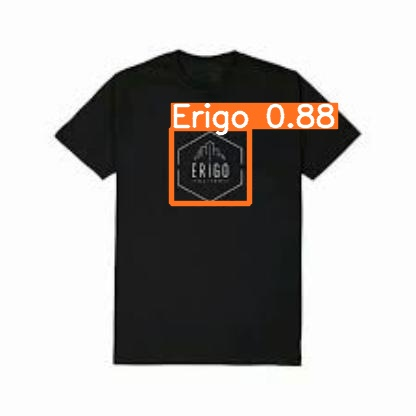

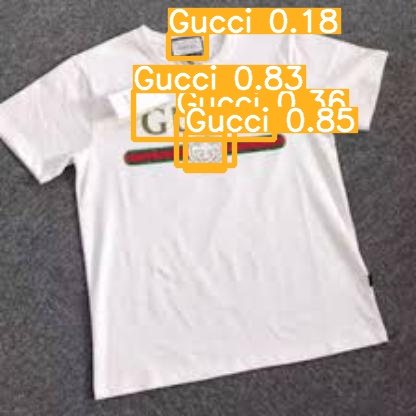

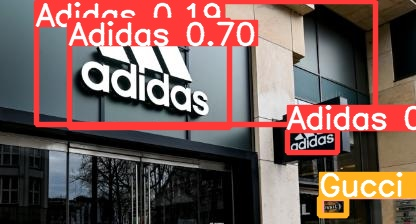

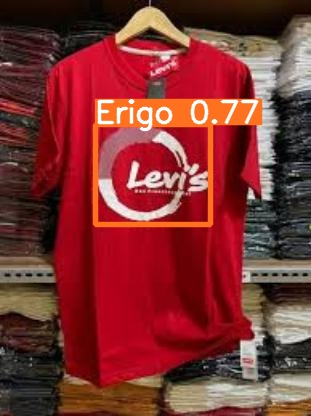

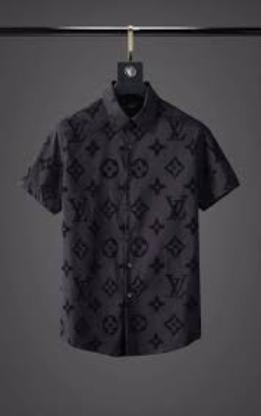

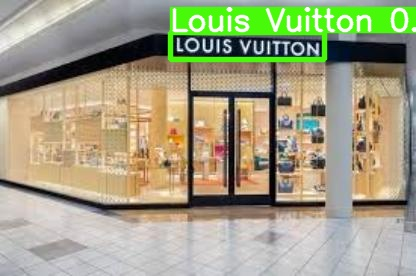

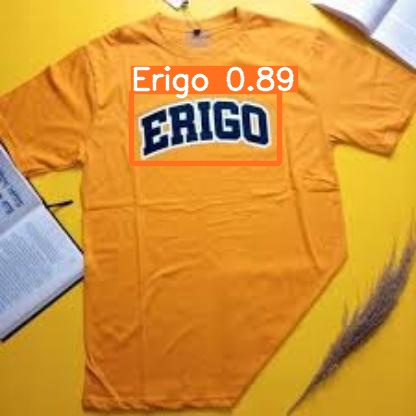

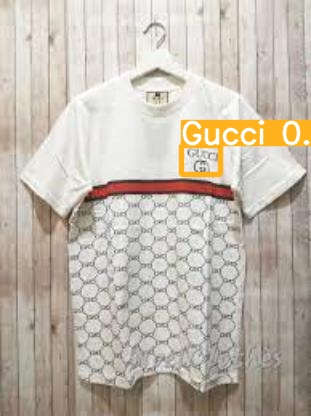

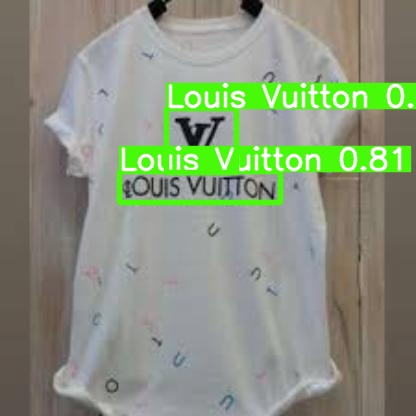

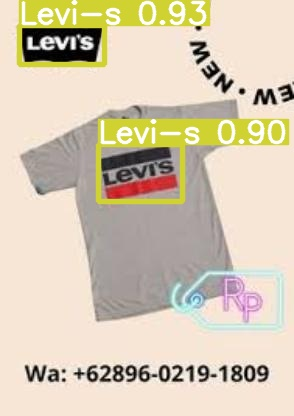

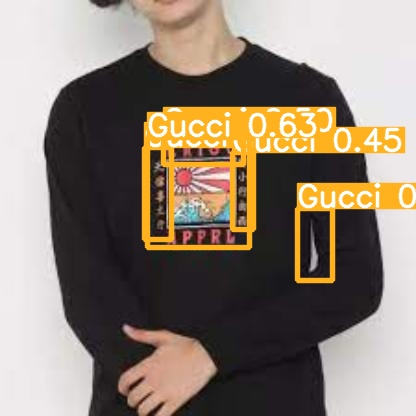

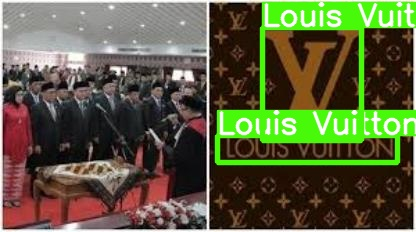

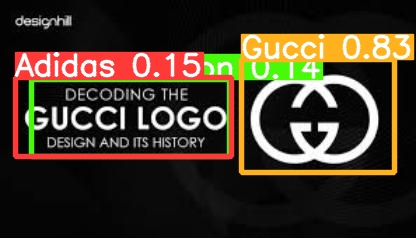

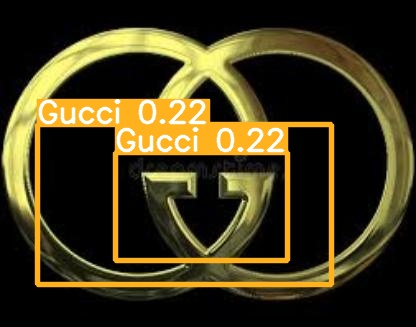

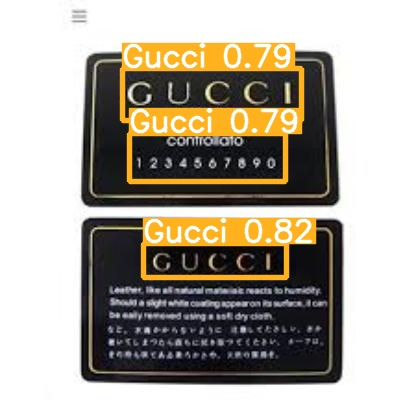

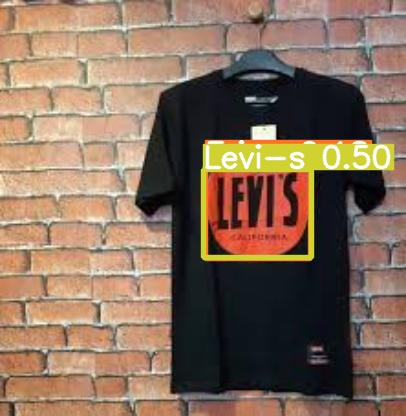

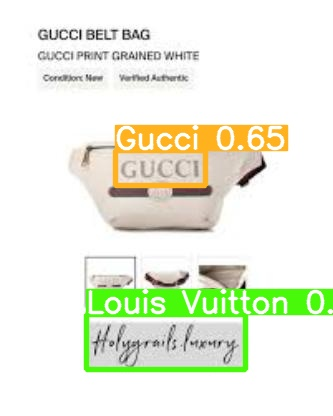

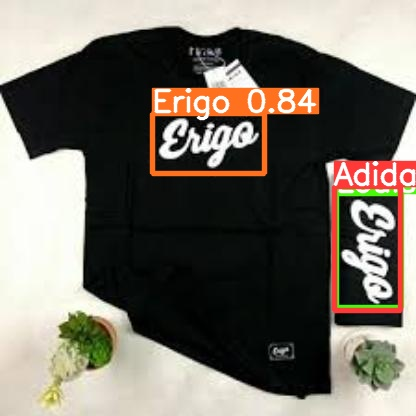

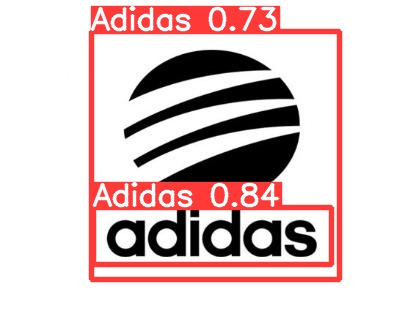

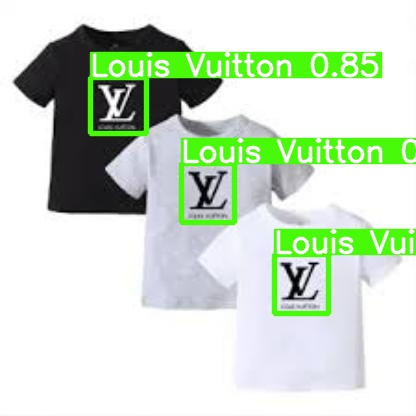

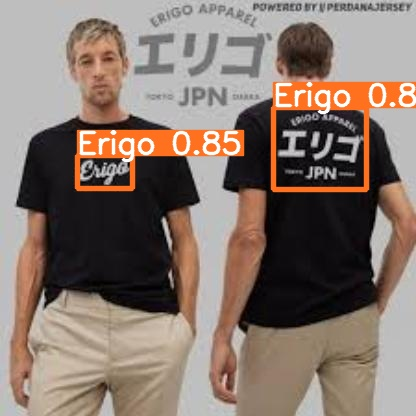

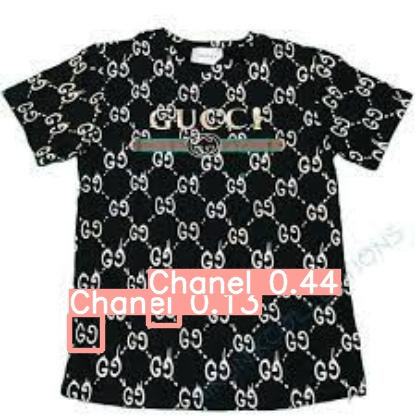

In [ ]:
# Display Inference on All test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):  # assuming jpg
    i += 1

    if i < 30:
        display(Image(filename=imageName))
        print("\n")


Save Model

In [ ]:
# export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>